<a href="https://colab.research.google.com/github/fourfeatherz/DS2002F24/blob/main/Labs/Pandas_and_CSV_Hands_On.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd

# Load the data into dataframe
accdata = pd.read_csv('acc_players-2324F.csv')
accdata.columns = accdata.iloc[0]
accdata = accdata[1:]

# Display the first five rows
accdata.head()

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
1,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
2,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
4,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0,-8.2
5,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9


In [33]:
# Total points scored by all players combined
accdata["PTS"] = pd.to_numeric(accdata["PTS"])
accdata["PTS"].sum()

38411

In [41]:
# Player with most minutes played
accdata["MP"] = pd.to_numeric(accdata["MP"])
accdata.loc[accdata["MP"].idxmax()][["Player","MP"]].to_list()

['Casey Morsell', 1333]

In [43]:
# Top 5 players for total rebounds
accdata["TRB"] = pd.to_numeric(accdata["TRB"])
accdata.nlargest(5,"TRB")[["Player","TRB"]]

,Player,TRB
6,Armando Bacot,380
179,Ian Schieffelin,340
91,Harrison Ingram,327
45,Mohamed Diarra,311
150,Norchad Omier,309


In [50]:
# Create new Dataframe for players with more than 500 minutes played
mp500data = accdata[accdata["MP"] > 500]
mp500data.head()

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
5,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9
6,6,Armando Bacot,SR,F,North Carolina,37,1123,380,56,22,...,60,100,538,0.54,0.544,0.4,0.781,24.6,6.1,8.9
8,8,Reece Beekman,SR,G,Virginia,34,1114,124,212,68,...,70,43,486,0.443,0.487,0.31,0.754,23.4,4.9,10.5
10,10,Chris Bell,SO,F,Syracuse,32,865,75,21,18,...,26,58,384,0.434,0.459,0.42,0.842,14.9,2.2,3.3


In [52]:
# Highest total assists from mp500data
mp500data["AST"] = pd.to_numeric(mp500data["AST"])
mp500data.loc[mp500data["AST"].idxmax()][["Player","AST"]].to_list()

C:\Users\wanns\AppData\Local\Temp\ipykernel_14196\249559313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp500data["AST"] = pd.to_numeric(mp500data["AST"])


['Reece Beekman', 212]

In [57]:
# Top 3 Assist Leads (Most Assists Total)
accdata.nlargest(3,"AST")[["Player","AST"]]

,Player,AST
8,Reece Beekman,212
216,Jaeden Zackery,152
22,Elliot Cadeau,150


In [58]:
# Top 3 Shot Blockers
accdata["BLK"] = pd.to_numeric(accdata["BLK"])
accdata.nlargest(3,"BLK")[["Player","BLK"]]

,Player,BLK
52,Ryan Dunn,77
158,Quinten Post,61
6,Armando Bacot,56


In [63]:
# Group by school and calculate total points for each scool
team_totpt = accdata.groupby('School')[['PTS']].sum().reset_index()
team_totpt

,School,PTS
0,Boston College,2667
1,Clemson,2785
2,Duke,2830
3,Florida State,2526
4,Georgia Tech,2272
5,Louisville,2304
6,Miami (FL),2424
7,NC State,3101
8,North Carolina,3032
9,Notre Dame,2113


In [62]:
# Group by school and calculate total assists for each scool
accdata.groupby('School')[['AST']].sum().reset_index()

,School,AST
0,Boston College,509
1,Clemson,533
2,Duke,551
3,Florida State,406
4,Georgia Tech,425
5,Louisville,356
6,Miami (FL),454
7,NC State,536
8,North Carolina,536
9,Notre Dame,335


In [70]:
# Sort schools by total points scored and display top 3 schools
team_totpt.sort_values(by="PTS", ascending = False).head(3)

,School,PTS
7,NC State,3101
8,North Carolina,3032
2,Duke,2830


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


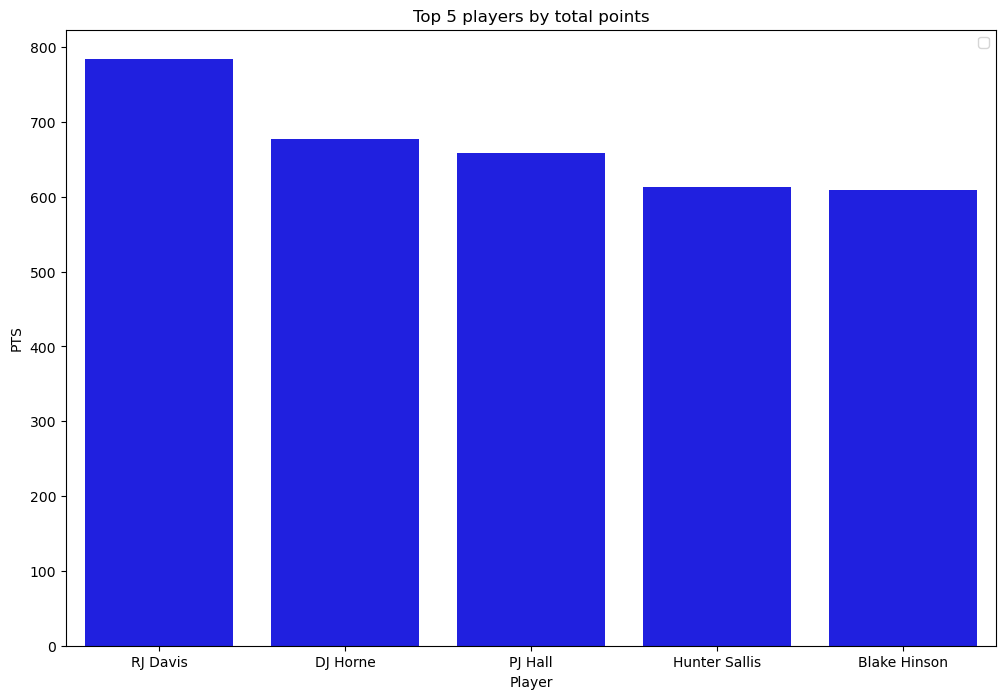

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 5 scorers
plt.figure(figsize=(12,8))
top_5 = accdata.nlargest(5,"PTS")

sns.barplot(x='Player', y='PTS', data=top_5, color="b")
plt.title('Top 5 players by total points')
plt.legend()
plt.show()

0.4210663894199787

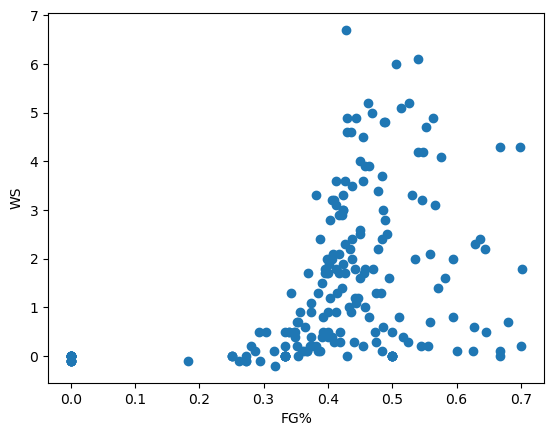

In [81]:
# Correlation coefficient and scatterplotof FG% and WS
accdata["FG%"] = pd.to_numeric(accdata["FG%"])
accdata["WS"] = pd.to_numeric(accdata["WS"])
plt.scatter(accdata["FG%"], accdata["WS"])
plt.xlabel("FG%")
plt.ylabel("WS")
accdata["FG%"].corr(accdata["WS"])